In [215]:
import sklearn as sk
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df = pd.read_csv('../csvs/lab8.csv',encoding='cp1251')
print(df.head(5))


   id  gender  age  income  spending_rating
0   1       1   19      15               39
1   2       1   21      15               81
2   3       0   20      16                6
3   4       0   23      16               77
4   5       0   31      17               40


In [216]:
scaler = StandardScaler()
x = df.drop(['id','gender'], axis=1)
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled)
print(x_scaled.describe())

x_normal = normalize(x_scaled)
x_normal = pd.DataFrame(x_normal)

print(x_normal.describe())


                  0           1             2
count  1.980000e+02  198.000000  1.980000e+02
mean  -1.345725e-17    0.000000 -8.186493e-17
std    1.002535e+00    1.002535  1.002535e+00
min   -1.496154e+00   -1.798943 -1.908243e+00
25%   -7.573597e-01   -0.701404 -6.084067e-01
50%   -1.987591e-01    0.043355  7.305224e-03
75%    7.202289e-01    0.670521  8.673472e-01
max    2.251876e+00    2.983193  1.922853e+00
                0           1           2
count  198.000000  198.000000  198.000000
mean     0.000783   -0.024501    0.003985
std      0.633074    0.539758    0.558869
min     -0.999719   -0.930353   -0.986610
25%     -0.491818   -0.559131   -0.470359
50%     -0.138736    0.034717    0.004407
75%      0.591621    0.430034    0.477197
max      0.999110    0.957036    0.981024


In [217]:
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_normal)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['V1', 'V2']
print(x_principal.head())
x_principal.to_csv('../csvs/lab8new.csv', header=True)


         V1        V2
0 -0.359225 -0.802355
1 -0.625215 -0.734855
2 -0.037151 -0.647257
3 -0.585783 -0.768336
4 -0.071218 -0.930982


In [218]:
df = pd.read_csv('../csvs/lab8new.csv',encoding='cp1251')
dbscan = DBSCAN(eps=0.055, min_samples=4).fit(df)
labels = dbscan.labels_
df['cluster'] = dbscan.labels_
print(df.tail())

     Unnamed: 0        V1        V2  cluster
193         193  0.367199  0.889214       -1
194         194  0.225767  0.971369       -1
195         195 -0.405476  0.925898       -1
196         196 -0.002821  0.918254       -1
197         197 -0.441687  0.901815       -1


In [219]:
print(set(dbscan.labels_))
print(len(set(dbscan.labels_)) - 1)
print(list(dbscan.labels_).count(-1) / len(list(dbscan.labels_)))

{-1}
0
1.0


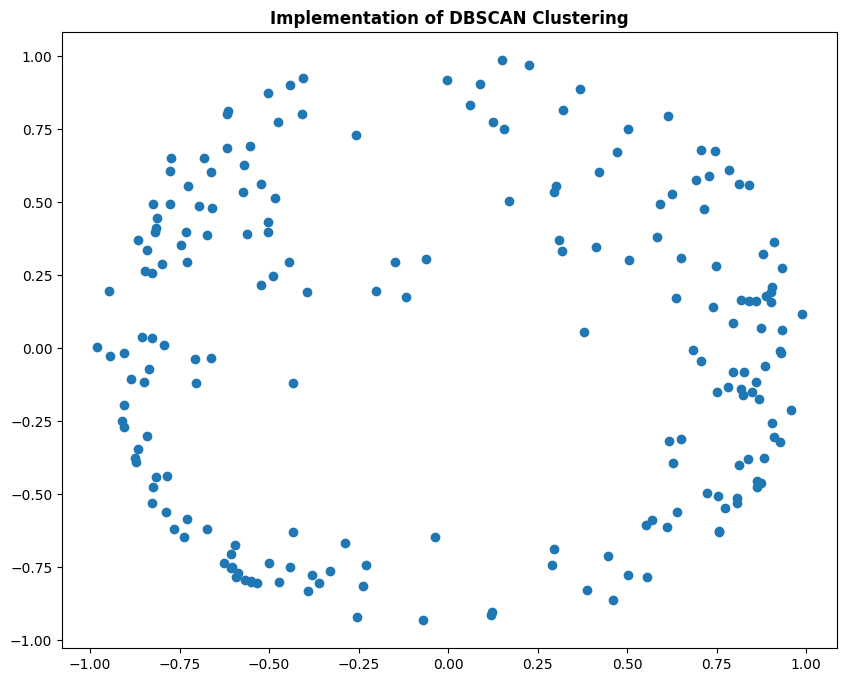

In [220]:
plt.figure(figsize=(10, 8))
plt.scatter(df['V1'], df['V2'])
plt.title("Implementation of DBSCAN Clustering", fontweight="bold")
plt.show()


1. Загрузить пред обработанные данные, вывести первые 5 строк из 
датасета;
2. Стандартизировать данные;
3. Уменьшить размерность данных с помощью алгоритма главных 
компонент;
4. Реализовать методы DBSCAN и OPTICS; 
5. Выделить метки кластеров, количество и процент неудач;
6. Визуализировать полученные данные по каждому методу;
7. Сделать выводы и описать различие методов.

In [221]:
df = pd.read_csv('../csvs/lab8.csv',encoding='cp1251')
print(df.head(5))

   id  gender  age  income  spending_rating
0   1       1   19      15               39
1   2       1   21      15               81
2   3       0   20      16                6
3   4       0   23      16               77
4   5       0   31      17               40


In [222]:
scal = StandardScaler()
x = df.drop(['id','gender'], axis=1)
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled)
x_normal = normalize(x_scaled)
x_normal = pd.DataFrame(x_normal)

print(x_normal.describe())

                0           1           2
count  198.000000  198.000000  198.000000
mean     0.000783   -0.024501    0.003985
std      0.633074    0.539758    0.558869
min     -0.999719   -0.930353   -0.986610
25%     -0.491818   -0.559131   -0.470359
50%     -0.138736    0.034717    0.004407
75%      0.591621    0.430034    0.477197
max      0.999110    0.957036    0.981024


In [223]:
pca = PCA(n_components=2)

x_converted = pca.fit_transform(x_normal)
x_converted = pd.DataFrame(x_converted)
x_converted.columns = ['V1', 'V2']
print(x_converted.head())


         V1        V2
0 -0.359225 -0.802355
1 -0.625215 -0.734855
2 -0.037151 -0.647257
3 -0.585783 -0.768336
4 -0.071218 -0.930982


In [231]:
dbscan = DBSCAN(eps=0.031).fit(x_converted)
labels = dbscan.labels_
opt = OPTICS(eps=0.031).fit(x_converted)
print(set(dbscan.labels_))
print(set(opt.labels_))
x_converted['DB_cluster'] = dbscan.labels_
x_converted['OPT_cluster'] = opt.labels_
x_converted['gender'] = df['gender']
print(x_converted.tail())

{-1}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, -1}
           V1        V2  DB_cluster  OPT_cluster  gender
193  0.367199  0.889214          -1           21       0
194  0.225767  0.971369          -1           21       0
195 -0.405476  0.925898          -1           22       1
196 -0.002821  0.918254          -1           -1       1
197 -0.441687  0.901815          -1           22       1


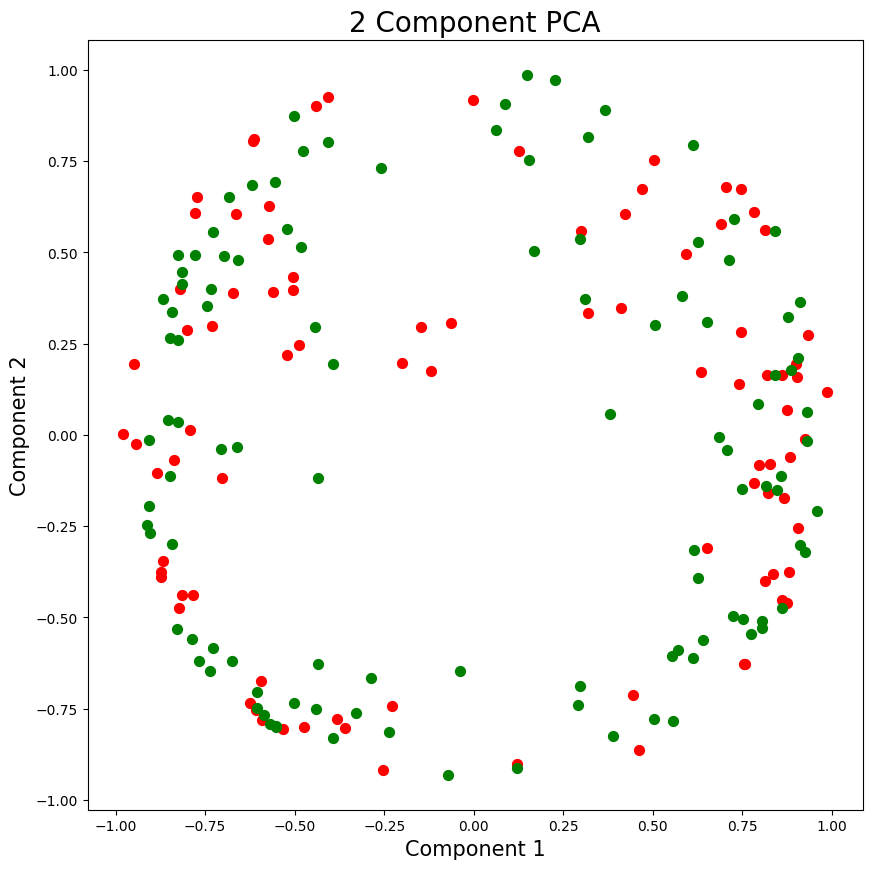

In [225]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
gender = [1, 0]
colors = ['r', 'g']
for gender, color in zip(gender,colors):
    indicesToKeep= x_converted['gender'] == gender
    ax.scatter(x_converted.loc[indicesToKeep, 'V1']
               , x_converted.loc[indicesToKeep, 'V2']
               , c = color, s = 50)
plt.show()